<a href="https://colab.research.google.com/github/eberesquivel/pandas/blob/master/ReregresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
files.upload()

Saving MultipleLinear.csv to MultipleLinear (1).csv


{'MultipleLinear.csv': b'"y","x1","x2"\n16.68,7,560\n11.5,3,220\n12.03,3,340\n14.88,4,80\n13.75,6,150\n18.11,7,330\n8,2,110\n17.83,7,210\n79.24,30,1460\n21.5,5,605\n40.33,16,688\n21,10,215\n13.5,4,255\n19.75,6,462\n24,9,448\n29,10,776\n15.35,6,200\n19,7,132\n9.5,3,36\n35.1,17,770\n17.9,10,140\n52.32,26,810\n18.75,9,450\n19.83,8,635\n10.75,4,150\n'}

In [2]:
import pandas as pd
pd.__version__

'1.0.5'

#**Regresión Lineal Multiple: Ejemplo mínimo**


In [3]:
import pandas as pd
df = pd.read_csv('MultipleLinear.csv')
print (df)
print (df.columns)

        y  x1    x2
0   16.68   7   560
1   11.50   3   220
2   12.03   3   340
3   14.88   4    80
4   13.75   6   150
5   18.11   7   330
6    8.00   2   110
7   17.83   7   210
8   79.24  30  1460
9   21.50   5   605
10  40.33  16   688
11  21.00  10   215
12  13.50   4   255
13  19.75   6   462
14  24.00   9   448
15  29.00  10   776
16  15.35   6   200
17  19.00   7   132
18   9.50   3    36
19  35.10  17   770
20  17.90  10   140
21  52.32  26   810
22  18.75   9   450
23  19.83   8   635
24  10.75   4   150
Index(['y', 'x1', 'x2'], dtype='object')


In [4]:
dataset = df.values

In [5]:
print(dataset)

[[  16.68    7.    560.  ]
 [  11.5     3.    220.  ]
 [  12.03    3.    340.  ]
 [  14.88    4.     80.  ]
 [  13.75    6.    150.  ]
 [  18.11    7.    330.  ]
 [   8.      2.    110.  ]
 [  17.83    7.    210.  ]
 [  79.24   30.   1460.  ]
 [  21.5     5.    605.  ]
 [  40.33   16.    688.  ]
 [  21.     10.    215.  ]
 [  13.5     4.    255.  ]
 [  19.75    6.    462.  ]
 [  24.      9.    448.  ]
 [  29.     10.    776.  ]
 [  15.35    6.    200.  ]
 [  19.      7.    132.  ]
 [   9.5     3.     36.  ]
 [  35.1    17.    770.  ]
 [  17.9    10.    140.  ]
 [  52.32   26.    810.  ]
 [  18.75    9.    450.  ]
 [  19.83    8.    635.  ]
 [  10.75    4.    150.  ]]


**Separar los valores en X,Y**

X.  Características(X1,X2)

Y. Variable a predecir




In [6]:
X = dataset[:,1:3]
Y = dataset[:,0]

In [7]:
print(Y)

[16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 79.24 21.5  40.33 21.
 13.5  19.75 24.   29.   15.35 19.    9.5  35.1  17.9  52.32 18.75 19.83
 10.75]


**Importar KERAS**

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0


**Modelo**


---
**Capas ocultas**
Si se tienen dos o mas capas escondidas se le conoce como red neuronal produnda 
####Funcion de activacion: Calcula la informacion de salida de una neurona
**One epoch: Una pasada hacia adelande y hacia atas para todos lo valores de entrenamiento**
######Loss: Es la penalización al modelo por una mala predicción
######mse: cuadrado de la media del error
######mae: Error absoluto medio
######learning_rate(Taza de aprendizaje) Controla que tan rápido se adapta el modelo al problema
*Valores menores de aprendizaje requieren mas epochs ya que se hacen cambios mas peque;os en los pesos, en cada actualizacion*


In [9]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu',input_shape=[2]),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer = optimizer,
                metrics=['mae','mse'])
  return model

In [10]:
model = build_model()

In [11]:
model.fit(X,Y,epochs=10,verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 63.8246 - mae: 6.7071 - mse: 63.8246
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1155.0518 - mae: 28.0010 - mse: 1155.0518
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 60.8939 - mae: 6.7279 - mse: 60.8939
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 61.0265 - mae: 6.6267 - mse: 61.0265
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 61.0393 - mae: 6.7404 - mse: 61.0393
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 60.0475 - mae: 6.6304 - mse: 60.0475
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 59.6862 - mae: 6.6529 - mse: 59.6862
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 59.3685 - mae: 6.6180 - mse: 59.3685
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 58.7051 - mae: 6.5941 - mse: 58.7051
Epoch 10/10
1/1 [===============

# Opciones para verbose :*0 = Silent , 1 = Barra de avance, 2 = Una línea por epoch*

In [12]:
model.fit(X,Y,epochs=10,verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 58.3132 - mae: 6.5726 - mse: 58.3132
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 58.1876 - mae: 6.5656 - mse: 58.1876
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 58.0683 - mae: 6.5600 - mse: 58.0683
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 57.9599 - mae: 6.5532 - mse: 57.9599
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 57.8498 - mae: 6.5486 - mse: 57.8498
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 57.7414 - mae: 6.5409 - mse: 57.7414
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 57.6292 - mae: 6.5376 - mse: 57.6292
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 57.5135 - mae: 6.5272 - mse: 57.5135
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 57.3951 - mae: 6.5277 - mse: 57.3951
Epoch 10/10
1/1 [====================

**modulo tfdocs.EpochDots**
######Imprime solamente un punto por cada epoch y los metricos cada 100 epochs
######Es necesario instalar modulo tensoflow_docs

In [13]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ymhpxjjz
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ymhpxjjz
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0a610a0dfdbc3aa8b6ede00aa698b20ede1bfbc6a_-cp36-none-any.whl size=124951 sha256=184615bb6fc659f46c8214106333ff60d70426417517c778ae55aee9a0eb8cc8
  Stored in directory: /tmp/pip-ephem-wheel-cache-fmd70ml0/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


**Importar el modulo tensorflow_docs**

In [14]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [21]:
EPOCHS = 1000
history = model.fit(
    X,Y,
    epochs = EPOCHS, verbose=0,
    callbacks = [tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:11.5133,  mae:2.5364,  mse:11.5133,  
....................................................................................................
Epoch: 100, loss:11.0333,  mae:2.6298,  mse:11.0333,  
....................................................................................................
Epoch: 200, loss:10.3559,  mae:2.4020,  mse:10.3559,  
....................................................................................................
Epoch: 300, loss:10.6064,  mae:2.3670,  mse:10.6064,  
....................................................................................................
Epoch: 400, loss:6.8657,  mae:1.9875,  mse:6.8657,  
....................................................................................................
Epoch: 500, loss:8.9013,  mae:2.3454,  mse:8.9013,  
....................................................................................................
Epoch: 600, loss:6.1812,  mae:1.8530,  mse:6.1812,  
................

**Grafica de valores reales contra prediccion 

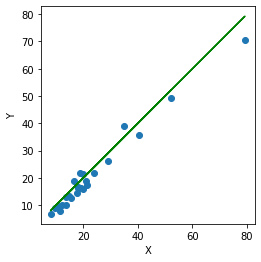

In [22]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(Y,test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(Y,Y,color='green')

**Probar la prediccion con un valor de X1,X2**

In [24]:
import numpy as np
model.predict(np.array([[4,150]]))

array([[9.819583]], dtype=float32)